In [1]:
from astropy.table import Table,vstack
import rafias_lib as rl
import numpy as np
import pdb, glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fnames = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits'))

In [3]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, fnames)

In [4]:
badpxl = Table(names = ('#Badpixels','Time'))
for filename in fnames:
    image, time, _, mask = rl.test_image(filename)
    num_badpxl = len(image[mask])
    badpxl.add_row([num_badpxl,time])
badpxl

#Badpixels,Time
float64,float64
38.0,0.0
38.0,22.38012
38.0,44.76024
38.0,67.14036
38.0,89.52048
38.0,111.9006
38.0,134.28072
38.0,156.66084
38.0,179.04096


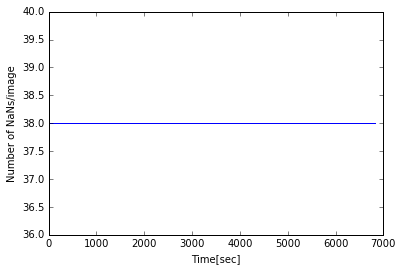

In [5]:
plt.plot(badpxl['Time'], badpxl['#Badpixels'])
plt.xlabel('Time[sec]')
plt.ylabel('Number of NaNs/image')

In [18]:
r = 70
bp_in_source = Table(names = ('#Badpixels','Time'))
for filename in fnames:
    image, time, _, mask1 = rl.test_image(filename)
    y, x = np.mgrid[:image.shape[0], :image.shape[1]]
    mask2 = ((x - 166)**2 + (y - 160)**2) <= (r**2)
    points = (mask1 == True) & (mask2 == True)
    num_bp = len(image[points])
    bp_in_source.add_row([num_bp, time])
bp_in_source

#Badpixels,Time
float64,float64
7.0,0.0
7.0,22.38012
7.0,44.76024
7.0,67.14036
7.0,89.52048
7.0,111.9006
7.0,134.28072
7.0,156.66084
7.0,179.04096


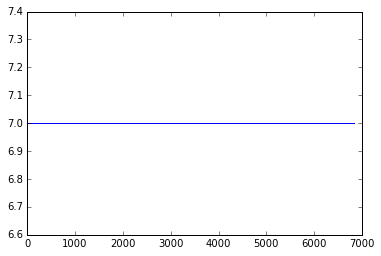

In [20]:
plt.plot(bp_in_source['Time'], bp_in_source['#Badpixels'])

In [21]:
t = Table()
t['Bad pixels in full image'] = badpxl['#Badpixels']
t['Bad pixels inside source (70px)'] = bp_in_source['#Badpixels']
t['Time'] = bp_in_source['Time']

In [22]:
t

Bad pixels in full image,Bad pixels inside source (70px),Time
float64,float64,float64
38.0,7.0,0.0
38.0,7.0,22.38012
38.0,7.0,44.76024
38.0,7.0,67.14036
38.0,7.0,89.52048
38.0,7.0,111.9006
38.0,7.0,134.28072
38.0,7.0,156.66084
38.0,7.0,179.04096
